# Bisnis Understanding

Fokus utama adalah memprediksi apakah suatu startup yang sedang beroperasi akan menjadi sukses atau mengalami kegagalan di masa depan. Melalui analisis yang kami lakukan, kami dapat mencari pola atau korelasi antara fitur-fitur tertentu (seperti total pendanaan, lokasi geografis, kategori bisnis) dengan status operasional perusahaan. Hal ini dapat memberikan wawasan tentang faktor-faktor yang berkorelasi dengan kesuksesan atau kegagalan startup.

## Pertanyaan Bisnis
1. Bagaimana hubungan antara  total pendanaan (funding_total_usd) dengan status suatu startup?
2.  Kategori startup(category_list) mana yang memiliki jumlah startup sukses paling banyak?
3. Berapa persentase perusahaan startup yang beroprasi dan yang gagal(closed) dan berapa persen yang sukses?
4. Apakah ada perbedaan signifikan dalam jumlah pendanaan terkait dengan lokasi startup?
5. Bagaimana faktor waktu memengaruhi kesuksesan sebuah startup?
6. Apa saja kategori start up yang sukses di USA?

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/frhannn1/startup_status_prediction/main/big_startup_secsees_dataset.csv')
data.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [4]:
data.nunique()

,0
permalink,66368
name,66102
homepage_url,61191
category_list,27296
funding_total_usd,18896
status,4
country_code,137
state_code,311
region,1092
city,5111


In [5]:
data.duplicated().sum()

0

In [6]:
data['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

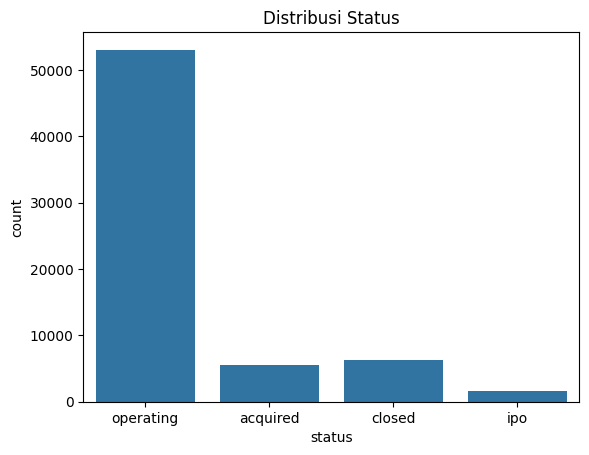

In [7]:
sns.countplot(x='status', data=data)
plt.title('Distribusi Status')
plt.show()

In [8]:
data_copy = data.copy()

In [9]:
count_status_train = data_copy[data_copy['status'].isin(['ipo', 'closed', 'acquired'])].shape[0]
count_status_train

13334

In [10]:
data_copy[data_copy['status'].isin(['ipo', 'close', 'acquired'])].isna().sum()

,0
permalink,0
name,0
homepage_url,498
category_list,133
funding_total_usd,0
status,0
country_code,340
state_code,427
region,401
city,401


In [11]:
data_copy[data_copy['status'].isin(['operating'])].shape[0]

53034

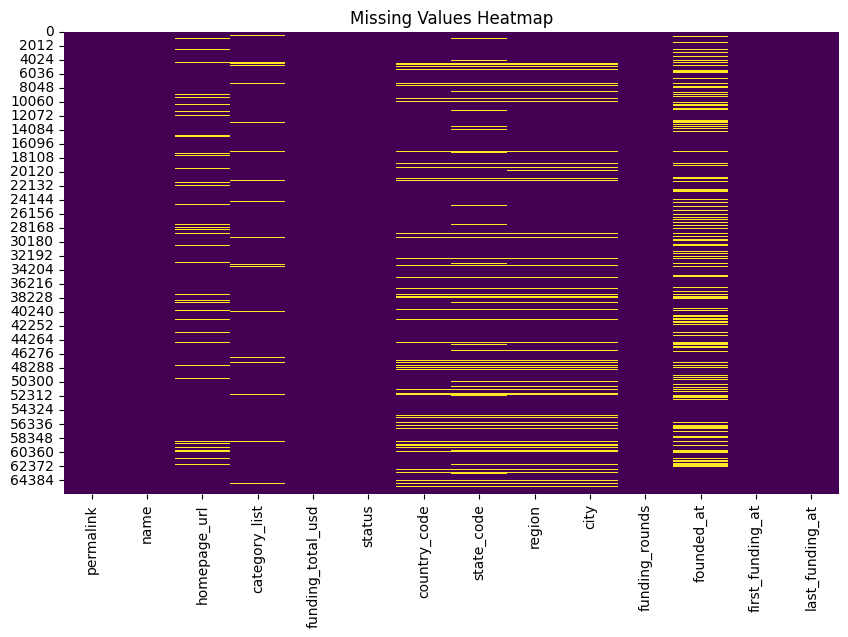

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.show()

In [13]:
data_copy

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [14]:
data_copy['status'] =  data_copy['status'].replace(['ipo', 'acquired'], 'success')


In [15]:
data_copy['status'].unique()

array(['operating', 'success', 'closed'], dtype=object)

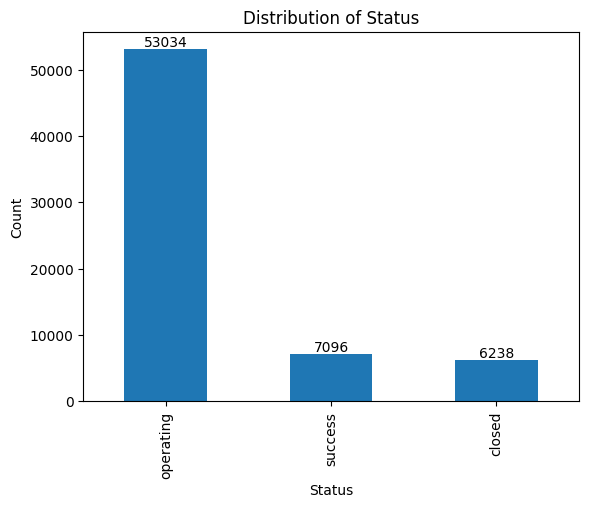

In [16]:
distribution_success = data_copy['status'].value_counts()
ax = distribution_success.plot(kind='bar')
ax.set_title('Distribution of Status')
ax.set_xlabel('Status')
ax.set_ylabel('Count')

# Menambahkan label jumlah pada setiap batang
for i, v in enumerate(distribution_success):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


# Explorasi Data Analys (EDA)

## Hubungan total_fund dengan status starup

In [17]:
data_totfund_status = data[['funding_total_usd','status']]
data_totfund_status

,funding_total_usd,status
0,10000000,operating
1,700000,operating
2,3406878,operating
3,2000000,operating
4,-,operating
...,...,...
66363,1587301,operating
66364,114304,operating
66365,-,operating
66366,18192,operating


ubah type data dari total fund ke numerik agar dapat dilakukan perhitungan

In [18]:
data_totfund_status['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')
non_numeric_values = data_totfund_status[data_totfund_status['funding_total_usd'].isnull()]['funding_total_usd']
non_numeric_values

<ipython-input-18-e50c885e25ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totfund_status['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')


,funding_total_usd
4,NaN
10,NaN
11,NaN
12,NaN
22,NaN
...,...
66345,NaN
66346,NaN
66347,NaN
66351,NaN


In [19]:
grouped_by_status = data_totfund_status.groupby('status')['funding_total_usd']
grouped_by_status.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4790.0,2.829304e+07,1.280034e+08,1500.0,2990956.75,10000000.0,26785659.5,5.820000e+09
closed,4912.0,1.089794e+07,4.380889e+07,2.0,200000.00,1250000.0,7000000.0,1.567504e+09
ipo,1441.0,1.457052e+08,9.882934e+08,4000.0,9400000.00,30675796.0,94100000.0,3.007950e+10
operating,42440.0,1.392845e+07,9.396951e+07,1.0,270803.50,1520832.0,7771325.0,1.066494e+10


In [20]:
grouped_by_status = data_totfund_status.groupby('status')['funding_total_usd']
grouped_by_status.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4790.0,2.829304e+07,1.280034e+08,1500.0,2990956.75,10000000.0,26785659.5,5.820000e+09
closed,4912.0,1.089794e+07,4.380889e+07,2.0,200000.00,1250000.0,7000000.0,1.567504e+09
ipo,1441.0,1.457052e+08,9.882934e+08,4000.0,9400000.00,30675796.0,94100000.0,3.007950e+10
operating,42440.0,1.392845e+07,9.396951e+07,1.0,270803.50,1520832.0,7771325.0,1.066494e+10


<ipython-input-21-19d39f60bd9c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='funding_total_usd', data=average_funding_by_status, palette=['orange', 'lightcoral','gold' , 'skyblue'])


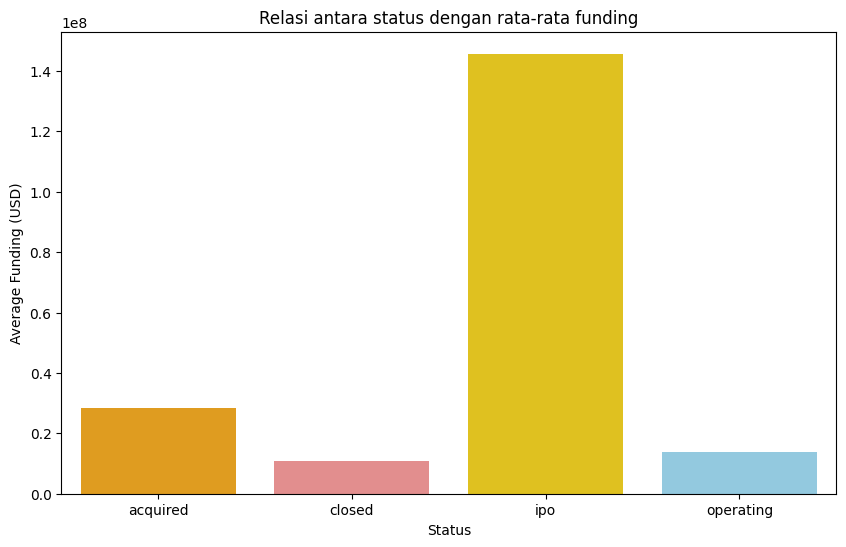

In [21]:
average_funding_by_status = data_totfund_status.groupby('status')['funding_total_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_total_usd', data=average_funding_by_status, palette=['orange', 'lightcoral','gold' , 'skyblue'])
plt.xlabel('Status')
plt.ylabel('Average Funding (USD)')
plt.title('Relasi antara status dengan rata-rata funding')
plt.show()

In [22]:
data_fund_success = data_copy[['status','funding_total_usd']]
data_fund_success

,status,funding_total_usd
0,operating,10000000
1,operating,700000
2,operating,3406878
3,operating,2000000
4,operating,-
...,...,...
66363,operating,1587301
66364,operating,114304
66365,operating,-
66366,operating,18192


In [23]:
data_fund_success['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')

<ipython-input-23-e5dced835bcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fund_success['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')


In [24]:
grouped_by_status_success = data_fund_success.groupby('status')['funding_total_usd']
grouped_by_status_success.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
closed,4912.0,1.089794e+07,4.380889e+07,2.0,200000.0,1250000.0,7000000.0,1.567504e+09
operating,42440.0,1.392845e+07,9.396951e+07,1.0,270803.5,1520832.0,7771325.0,1.066494e+10
success,6231.0,5.544613e+07,4.907197e+08,1500.0,3685000.0,12400000.0,35858302.5,3.007950e+10


<ipython-input-25-9aab6059a18a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='funding_total_usd', data=average_fundsuccess_by_status, palette=['lightcoral', 'skyblue','lightgreen'])


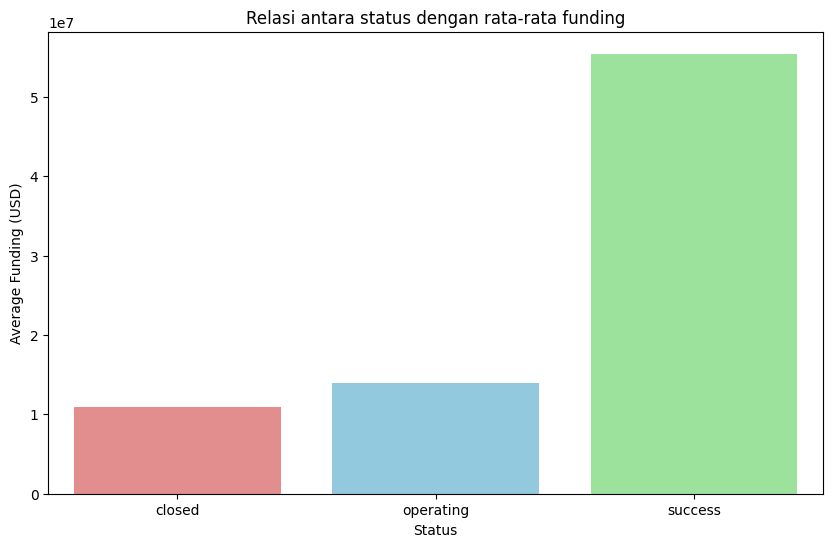

In [25]:
average_fundsuccess_by_status = data_fund_success.groupby('status')['funding_total_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_total_usd', data=average_fundsuccess_by_status, palette=['lightcoral', 'skyblue','lightgreen'])
plt.xlabel('Status')
plt.ylabel('Average Funding (USD)')
plt.title('Relasi antara status dengan rata-rata funding')
plt.show()

## Kategori startup(category_list) mana yang memiliki jumlah startup sukses paling banyak?

In [26]:
data['category_list'].nunique()

27296

In [27]:
data_kategori_totalfund =data[['category_list','funding_total_usd','status']]
data_kategori_totalfund

,category_list,funding_total_usd,status
0,Media,10000000,operating
1,Application Platforms|Real Time|Social Network...,700000,operating
2,Apps|Games|Mobile,3406878,operating
3,Curated Web,2000000,operating
4,Software,-,operating
...,...,...,...
66363,Enterprise Software,1587301,operating
66364,Advertising|Mobile|Web Development|Wireless,114304,operating
66365,NaN,-,operating
66366,Consumer Electronics|Internet of Things|Teleco...,18192,operating


In [28]:
data_kategori_totalfund['funding_total_usd'] = pd.to_numeric(data_kategori_totalfund['funding_total_usd'], errors='coerce')
grouped_data = data_kategori_totalfund.groupby('category_list').agg({'funding_total_usd': 'mean', 'status': 'unique'}).reset_index()


<ipython-input-28-082692900ef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kategori_totalfund['funding_total_usd'] = pd.to_numeric(data_kategori_totalfund['funding_total_usd'], errors='coerce')


In [29]:
highest_avg_funding_category = grouped_data.sort_values(by='funding_total_usd', ascending=False)
highest_avg_funding_category.head(20)

,category_list,funding_total_usd,status
12123,Communications Infrastructure|Information Tech...,1.504089e+10,"[operating, ipo]"
12810,Consulting|Product Development Services|Produc...,1.066494e+10,[operating]
24124,Internet|Telecommunications|Television|Video,5.162513e+09,[ipo]
5796,Architecture|Banking|Finance,5.150000e+09,[ipo]
7237,Banking|Financial Services|Insurance|Investmen...,4.745460e+09,[operating]
1209,Advertising|Broadcasting|Content,4.715000e+09,[acquired]
17030,Distributors|E-Commerce|Manufacturing,4.630000e+09,[ipo]
6604,Automotive|Design|Limousines|Public Transporta...,4.109165e+09,[operating]
26108,Payments|Trading,3.500000e+09,[ipo]
2288,Agriculture|Animal Feed|Biotechnology,3.200000e+09,[operating]


<ipython-input-30-5c765c5ebfb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='funding_total_usd', y='category_list', data=top_10_categories, palette='viridis')


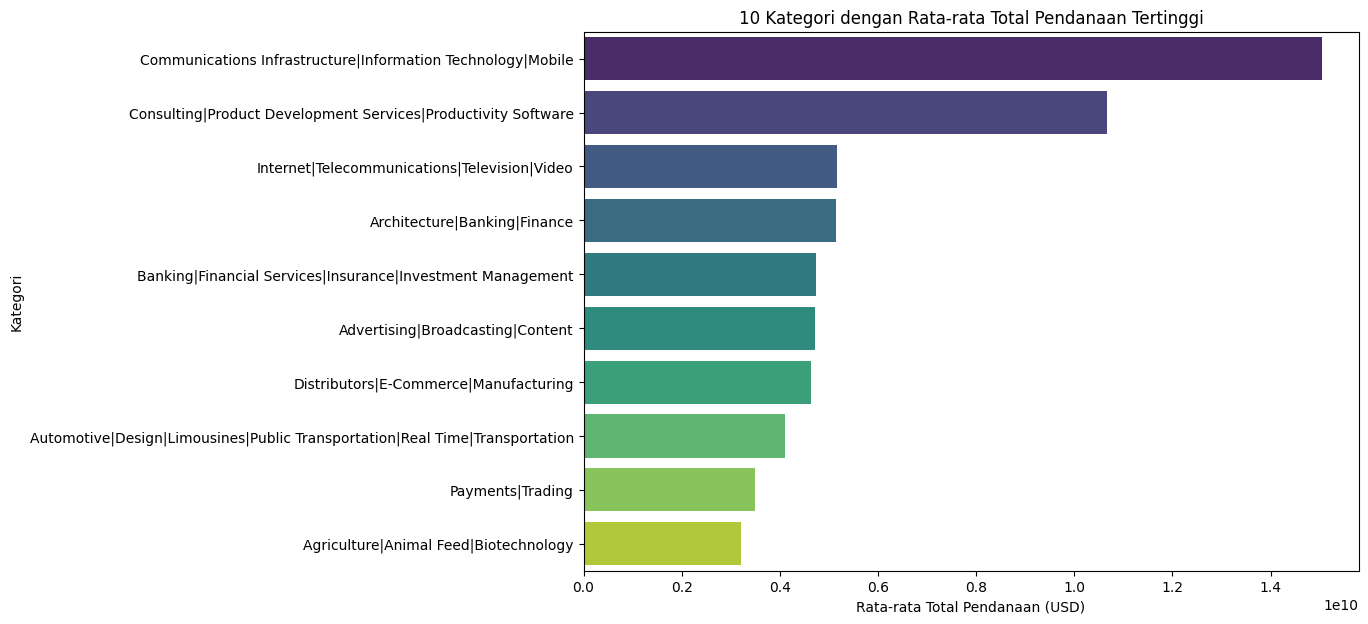

In [30]:
top_10_categories=highest_avg_funding_category.head(10)
plt.figure(figsize=(10, 7))
sns.barplot(x='funding_total_usd', y='category_list', data=top_10_categories, palette='viridis')
plt.xlabel('Rata-rata Total Pendanaan (USD)')
plt.ylabel('Kategori')
plt.title('10 Kategori dengan Rata-rata Total Pendanaan Tertinggi')
plt.show()

In [31]:
data_category_succes = data_copy[['category_list','status']]
data_category_succes

,category_list,status
0,Media,operating
1,Application Platforms|Real Time|Social Network...,operating
2,Apps|Games|Mobile,operating
3,Curated Web,operating
4,Software,operating
...,...,...
66363,Enterprise Software,operating
66364,Advertising|Mobile|Web Development|Wireless,operating
66365,NaN,operating
66366,Consumer Electronics|Internet of Things|Teleco...,operating


In [32]:
data_category_success = data_copy[data_copy['status'] == 'success'][['category_list', 'status']]

<ipython-input-33-2ad142176528>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category_list', data=data_category_success, order=top_10_categories_success,palette='viridis')


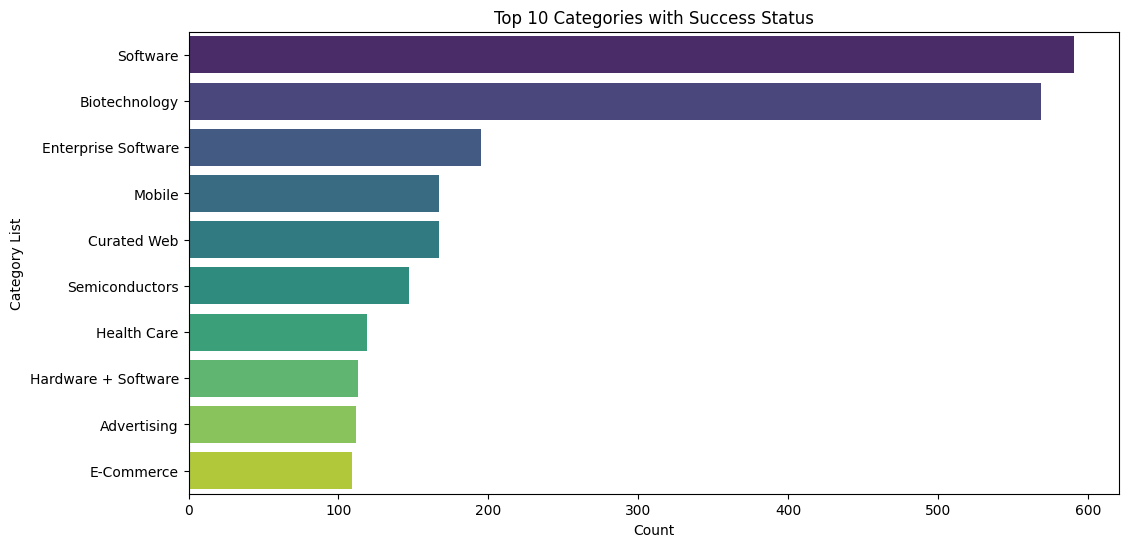

In [33]:
top_10_categories_success = data_category_success['category_list'].value_counts().nlargest(10).index

# Menggunakan data_category_success yang telah difilter
plt.figure(figsize=(12, 6))
sns.countplot(y='category_list', data=data_category_success, order=top_10_categories_success,palette='viridis')
plt.title('Top 10 Categories with Success Status')
plt.xlabel('Count')
plt.ylabel('Category List')
plt.show()

## Presentase startup yang tutup dengan starup yang sukses(ipo/acquired)

In [34]:
data_status = data['status']

In [35]:
data_status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [36]:
status_counts = data['status'].value_counts()

status_percentage = (status_counts / len(data)) * 100


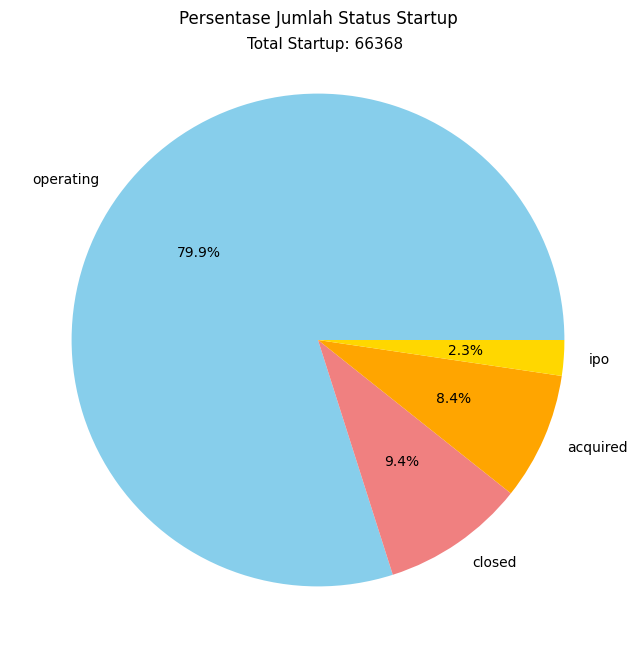

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(status_percentage, labels=status_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'orange', 'gold'])
plt.title('Persentase Jumlah Status Startup')
plt.text(0.03, 1.2, f"Total Startup: {len(data)}", color='black', ha='center', va='center', fontsize=11)
plt.show()

In [38]:
status_counts_succes = data_copy['status'].value_counts()

status_percentage_succes = (status_counts_succes / len(data)) * 100

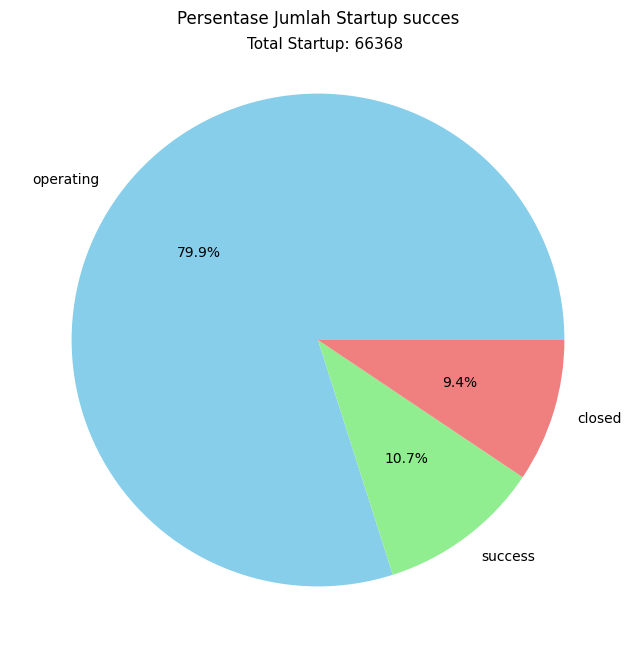

In [39]:
plt.figure(figsize=(8, 8))
plt.pie(status_percentage_succes, labels=status_percentage_succes.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Persentase Jumlah Startup succes')
plt.text(0.03, 1.2, f"Total Startup: {len(data)}", color='black', ha='center', va='center', fontsize=11)
plt.show()

## 4. Apakah ada perbedaan signifikan dalam jumlah pendanaan terkait dengan lokasi startup?


In [40]:
data1 = data.copy()

In [41]:
data1.isna()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,False,False,False,False,False,False,False,False,False,False,False,True,False,False
66364,False,False,False,False,False,False,False,False,False,False,False,False,False,False
66365,False,False,False,True,False,False,True,True,True,True,False,False,False,False
66366,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
null_per_column = data1.isna().sum()
null_per_column

,0
permalink,0
name,1
homepage_url,5058
category_list,3148
funding_total_usd,0
status,0
country_code,6958
state_code,8547
region,8030
city,8028


In [43]:
data1.dropna(inplace=True)
data1.isna().sum()

,0
permalink,0
name,0
homepage_url,0
category_list,0
funding_total_usd,0
status,0
country_code,0
state_code,0
region,0
city,0


In [44]:
data1_status_country = data1[['funding_total_usd','status','country_code']]
data1_status_country

,funding_total_usd,status,country_code
1,700000,operating,USA
3,2000000,operating,CHN
4,-,operating,USA
6,762851,operating,CAN
7,33600000,operating,USA
...,...,...,...
66358,15419877,closed,MYS
66361,2686600,operating,AUT
66362,1120000,operating,GBR
66364,114304,operating,HRV


In [45]:
country_values = data1['country_code'].value_counts()
country_values

,count
country_code,
USA,28051
GBR,2580
CAN,1413
IND,1253
FRA,838
...,...
QAT,1
TGO,1
CMR,1


In [46]:
data1['country_code'].unique()

array(['USA', 'CHN', 'CAN', 'CHL', 'GBR', 'IND', 'FRA', 'AUS', 'DNK',
       'ROM', 'AUT', 'NLD', 'SWE', 'JPN', 'RUS', 'KOR', 'COL', 'ESP',
       'BEL', 'IRL', 'ITA', 'ISR', 'NZL', 'CZE', 'DEU', 'CHE', 'BRA',
       'BGR', 'JOR', 'HUN', 'BWA', 'FIN', 'TUR', 'ARE', 'CYP', 'CRI',
       'IDN', 'SVN', 'ARG', 'NGA', 'TWN', 'THA', 'SVK', 'PRT', 'NOR',
       'UKR', 'LTU', 'ISL', 'POL', 'PHL', 'MEX', 'GHA', 'PER', 'EGY',
       'PAN', 'ALB', 'UGA', 'HRV', 'EST', 'KEN', 'MUS', 'LBN', 'LUX',
       'IRN', 'MYS', 'GTM', 'BAH', 'ARM', 'BGD', 'MDA', 'TUN', 'GRC',
       'NPL', 'LVA', 'TTO', 'BHR', 'CMR', 'SRB', 'BLR', 'CYM', 'ECU',
       'SLV', 'PAK', 'MKD', 'TGO', 'TAN', 'BMU', 'HND', 'MMR', 'QAT',
       'MAR', 'SAU', 'GEO', 'DOM', 'DZA', 'JAM', 'AZE', 'LIE', 'DMA',
       'OMN', 'RWA', 'KHM', 'GRD', 'LAO', 'LKA', 'SOM', 'SYC', 'PRY'],
      dtype=object)

In [47]:
len(data1['country_code'].unique())

108

In [48]:
funding_outlier = data1[data1['funding_total_usd'] != '-']

In [49]:
data1['funding_total_usd'] = data1['funding_total_usd'].replace('-', '0').astype(float)


In [50]:
funding_by_country = data1.groupby('country_code')['funding_total_usd'].mean()
pd.options.display.float_format = '{:.2f}'.format
funding_by_country

,funding_total_usd
country_code,
ALB,138372.06
ARE,19701667.53
ARG,1945248.24
ARM,8939166.67
AUS,8326008.29
...,...
TUR,3714062.74
TWN,20824839.21
UGA,401692.31


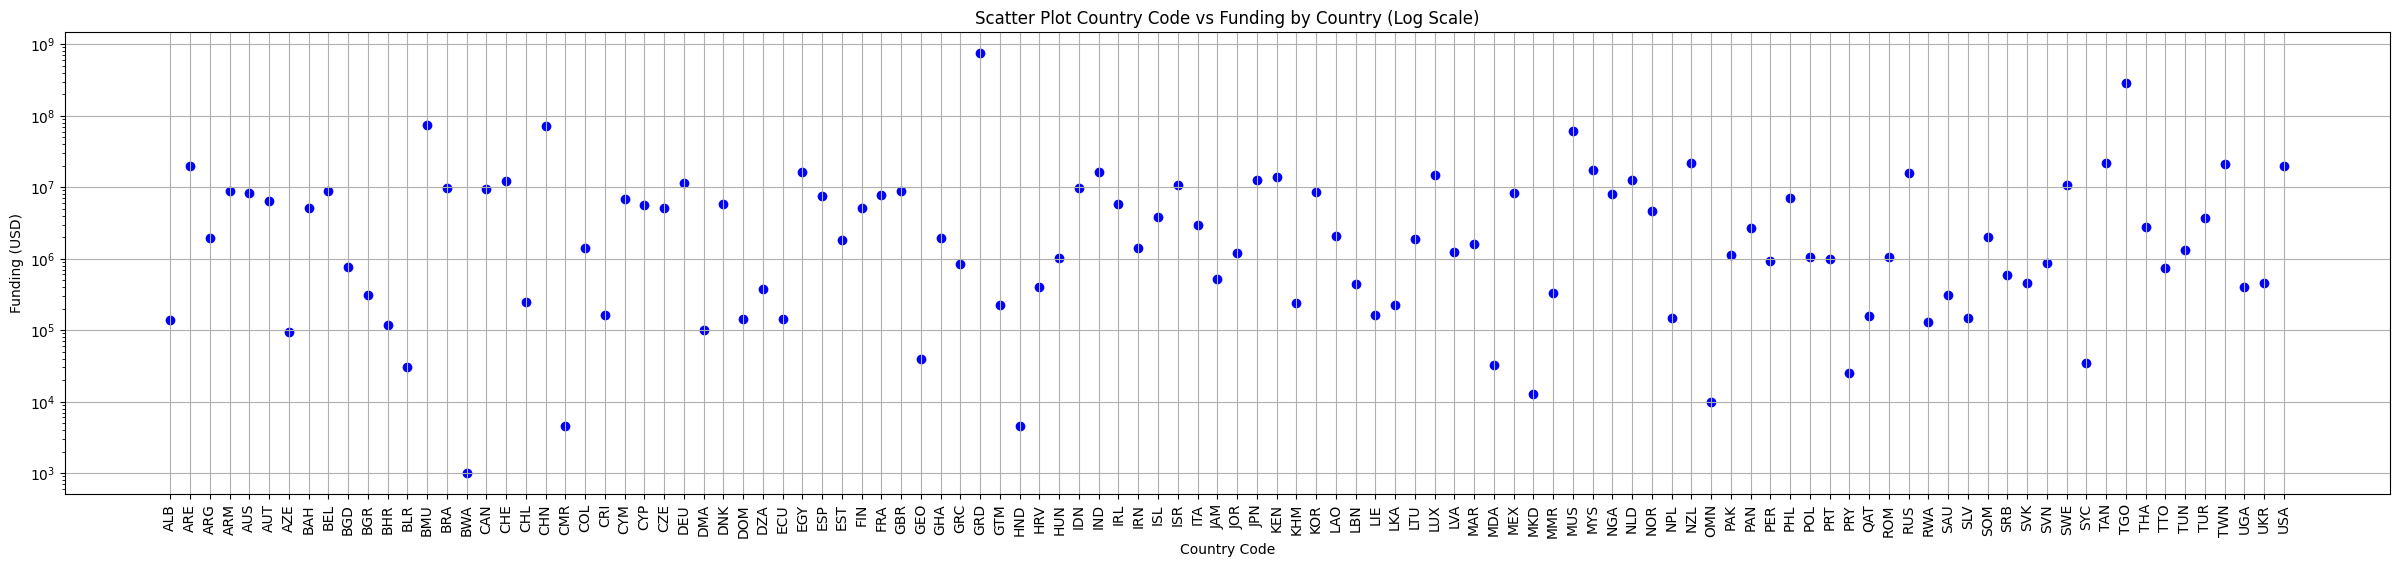

In [51]:
plt.figure(figsize=(30, 6))
plt.scatter(funding_by_country.index, funding_by_country.values, color='blue')

# Mengatur skala sumbu y menjadi logaritmik
plt.yscale('log')

plt.title('Scatter Plot Country Code vs Funding by Country (Log Scale)')
plt.xlabel('Country Code')
plt.ylabel('Funding (USD)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## 5. Bagaimana faktor waktu memengaruhi kesuksesan sebuah startup?


In [52]:
data1['founded_at'] = pd.to_datetime(data1['founded_at'], errors='coerce')
data1['first_funding_at'] = pd.to_datetime(data1['first_funding_at'], errors='coerce')
data1['last_funding_at'] = pd.to_datetime(data1['last_funding_at'], errors='coerce')

print(data1)

                                 permalink                    name  \
1                   /organization/-qounter                :Qounter   
3                    /organization/0-6-com                 0-6.com   
4           /organization/004-technologies        004 Technologies   
6      /organization/0ndine-biomedical-inc  Ondine Biomedical Inc.   
7                     /organization/0xdata                  H2O.ai   
...                                    ...                     ...   
66358       /organization/zyraz-technology        Zyraz Technology   
66361             /organization/zytoprotec              Zytoprotec   
66362                  /organization/zzish                   Zzish   
66364            /organization/zzzzapp-com   Zzzzapp Wireless ltd.   
66366                /organization/Ôasys-2                   Ôasys   

                            homepage_url  \
1                 http://www.qounter.com   
3                     http://www.0-6.com   
4      http://004gmbh.de/en

In [53]:
mask = data1['first_funding_at'] < data1['founded_at']
rows_to_drop = data1[mask]
fund_cleaned = data1.drop(rows_to_drop.index)
print(fund_cleaned)

                                 permalink                     name  \
3                    /organization/0-6-com                  0-6.com   
4           /organization/004-technologies         004 Technologies   
6      /organization/0ndine-biomedical-inc   Ondine Biomedical Inc.   
7                     /organization/0xdata                   H2O.ai   
9                /organization/1-2-3-listo              1,2,3 Listo   
...                                    ...                      ...   
66357                 /organization/zypsee  Whisk (formerly Zypsee)   
66358       /organization/zyraz-technology         Zyraz Technology   
66361             /organization/zytoprotec               Zytoprotec   
66362                  /organization/zzish                    Zzish   
66366                /organization/Ôasys-2                    Ôasys   

                            homepage_url  \
3                     http://www.0-6.com   
4      http://004gmbh.de/en/004-interact   
6              

In [54]:
data1['days_between_fundings'] = (data1['last_funding_at'] - data1['first_funding_at']).dt.days

print(data1)

                                 permalink                    name  \
1                   /organization/-qounter                :Qounter   
3                    /organization/0-6-com                 0-6.com   
4           /organization/004-technologies        004 Technologies   
6      /organization/0ndine-biomedical-inc  Ondine Biomedical Inc.   
7                     /organization/0xdata                  H2O.ai   
...                                    ...                     ...   
66358       /organization/zyraz-technology        Zyraz Technology   
66361             /organization/zytoprotec              Zytoprotec   
66362                  /organization/zzish                   Zzish   
66364            /organization/zzzzapp-com   Zzzzapp Wireless ltd.   
66366                /organization/Ôasys-2                   Ôasys   

                            homepage_url  \
1                 http://www.qounter.com   
3                     http://www.0-6.com   
4      http://004gmbh.de/en

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [56]:
scaler = MinMaxScaler()
data1[['days_between_fundings', 'funding_total_usd']] = scaler.fit_transform(data1[['days_between_fundings', 'funding_total_usd']])

In [57]:
data1_cleaned = data1.dropna(subset=['days_between_fundings', 'funding_total_usd'])


X = data1_cleaned[['days_between_fundings', 'funding_total_usd']]
y = data1_cleaned['status']


k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=4)

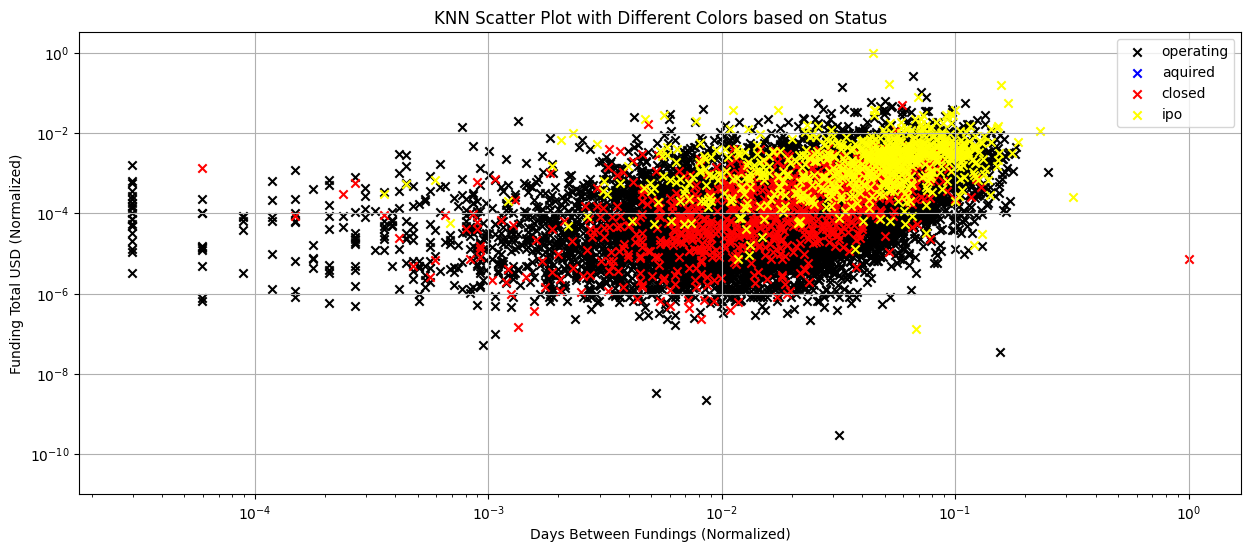

In [58]:
plt.figure(figsize=(15, 6))
colors = {'operating': 'black', 'aquired': 'blue', 'closed': 'red', 'ipo': 'yellow'}
plt.xscale('log')
plt.yscale('log')
for status, color in colors.items():
    mask = (data1['status'] == status)
    plt.scatter(data1.loc[mask, 'days_between_fundings'], data1.loc[mask, 'funding_total_usd'], color=color, label=status, marker='x')

plt.xlabel('Days Between Fundings (Normalized)')
plt.ylabel('Funding Total USD (Normalized)')
plt.title('KNN Scatter Plot with Different Colors based on Status')
plt.legend()
plt.grid(True)
plt.show()

## 6. Apa saja kategori start up yang sukses di USA?

In [59]:
data1['categories'] = data1['category_list'].str.split('|')
data1 = data1.explode('categories')


In [60]:
data1['categories'].explode().unique()

array(['Application Platforms', 'Real Time', 'Social Network Media',
       'Curated Web', 'Software', 'Biotechnology', 'Analytics', 'Mobile',
       'E-Commerce', 'Networking', 'Real Estate', 'Web Hosting',
       'Health and Wellness', 'Internet Marketing', 'Media',
       'Public Relations', 'Apps', 'Cable', 'Distribution', 'Education',
       'Search', 'Art', 'Marketplaces', 'Beauty', 'Local Businesses',
       'Restaurants', 'Cosmetics', 'Games', 'Health Care',
       'Health Care Information Technology', 'Hospitals', 'Advertising',
       'Image Recognition', 'Sales and Marketing', 'Social Media',
       'Social Media Advertising', 'Mobile Commerce', 'Social Commerce',
       'Enterprise Software', 'Mobility', 'Technology', 'Social Travel',
       'Personal Health', 'Sports', 'Audio', 'Music',
       'Health Diagnostics', 'Medical Devices', 'Personalization',
       'Pharmaceuticals', 'Politics', 'SaaS', 'Local Search',
       'Web Design', 'Service Providers', 'Publishing', 'Ser

In [61]:
data1['category_list'].isna().sum()

0

In [62]:
data1_usa = data1[data1['country_code'] == 'USA']
data1_usa

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,days_between_fundings,categories
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,0.00,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0.01,Application Platforms
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,0.00,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0.01,Real Time
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,0.00,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0.01,Social Network Media
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.00,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.00,Software
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,0.00,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0.03,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66356,/organization/zype,Zype,http://www.zype.com,Cloud Computing|Mobile Advertising|Video|Video...,0.00,operating,USA,NY,New York City,New York,2,2013-01-01,2015-04-01,2015-10-27,0.01,Video Streaming
66357,/organization/zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,0.00,operating,USA,NY,New York City,New York,2,2011-01-01,2013-07-26,2013-09-25,0.00,Public Transportation
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,0.00,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,0.00,Consumer Electronics
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,0.00,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,0.00,Internet of Things


In [63]:
category_counts_usa = data1_usa['category_list'].value_counts()
category_counts_usa

,count
category_list,
Software,2025
Biotechnology,1709
Mobile,495
Curated Web,490
Health Care,479
...,...
Lighting,1
Genetic Testing,1
Flash Storage,1


In [64]:
top_40 = data1_usa['category_list'].value_counts().head(40).index
top_40

Index(['Software', 'Biotechnology', 'Mobile', 'Curated Web', 'Health Care',
       'Hardware + Software', 'Clean Technology', 'Enterprise Software',
       'E-Commerce', 'Health and Wellness', 'Advertising', 'Manufacturing',
       'Games', 'Education', 'Biotechnology|Health Diagnostics',
       'Semiconductors', 'Security', 'Analytics', 'Real Estate', 'Consulting',
       'EdTech|Education', 'Finance', 'Biotechnology|Health Care',
       'Web Hosting', 'Hospitality', 'Social Media', 'Finance|FinTech',
       'Entertainment|Games', 'Medical', 'Fashion', 'Sports', 'Messaging',
       'Public Relations', 'Medical Devices', 'News', 'Internet', 'Music',
       'Media|News', 'Technology', 'Automotive'],
      dtype='object', name='category_list')

In [65]:
data_top_40 = data1_usa[data1_usa['category_list'].isin(top_40)]
data_top_40

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,days_between_fundings,categories
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.00,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.00,Software
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,0.00,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0.03,Analytics
8,/organization/1,One Inc.,http://whatis1.com,Mobile,0.00,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,0.03,Mobile
12,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,0.00,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,2010-08-19,2010-08-19,0.00,Health and Wellness
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,Health and Wellness,0.00,operating,USA,NJ,Newark,Iselin,1,1984-01-01,2011-03-02,2011-03-02,0.00,Health and Wellness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66340,/organization/zylun-staffing,Zylun Staffing,http://www.zylun.com,Software,0.00,operating,USA,UT,Salt Lake City,Lehi,1,2010-01-01,2014-08-28,2014-08-28,0.00,Software
66342,/organization/zymergen,Zymergen,http://www.zymergen.com,Biotechnology,0.00,operating,USA,CA,SF Bay Area,Emeryville,2,2013-01-01,2014-01-01,2015-06-16,0.02,Biotechnology
66343,/organization/zymetis,Zymetis,http://www.zymetis.com,Biotechnology,0.00,closed,USA,MD,"Washington, D.C.",College Park,3,2006-01-01,2007-01-01,2010-01-31,0.03,Biotechnology
66353,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,Biotechnology,0.00,operating,USA,MD,"Washington, D.C.",Gaithersburg,1,2008-01-01,2010-09-09,2010-09-09,0.00,Biotechnology


In [66]:
status_counts = data_top_40.groupby(['category_list', 'status']).size().unstack(fill_value=0)
status_counts

status,acquired,closed,ipo,operating
category_list,,,,
Advertising,72,41,3,228
Analytics,35,9,1,140
Automotive,4,2,4,49
Biotechnology,119,85,165,1340
Biotechnology|Health Care,8,0,132,20
Biotechnology|Health Diagnostics,22,10,26,202
Clean Technology,38,38,15,373
Consulting,13,12,3,155
Curated Web,91,91,4,304


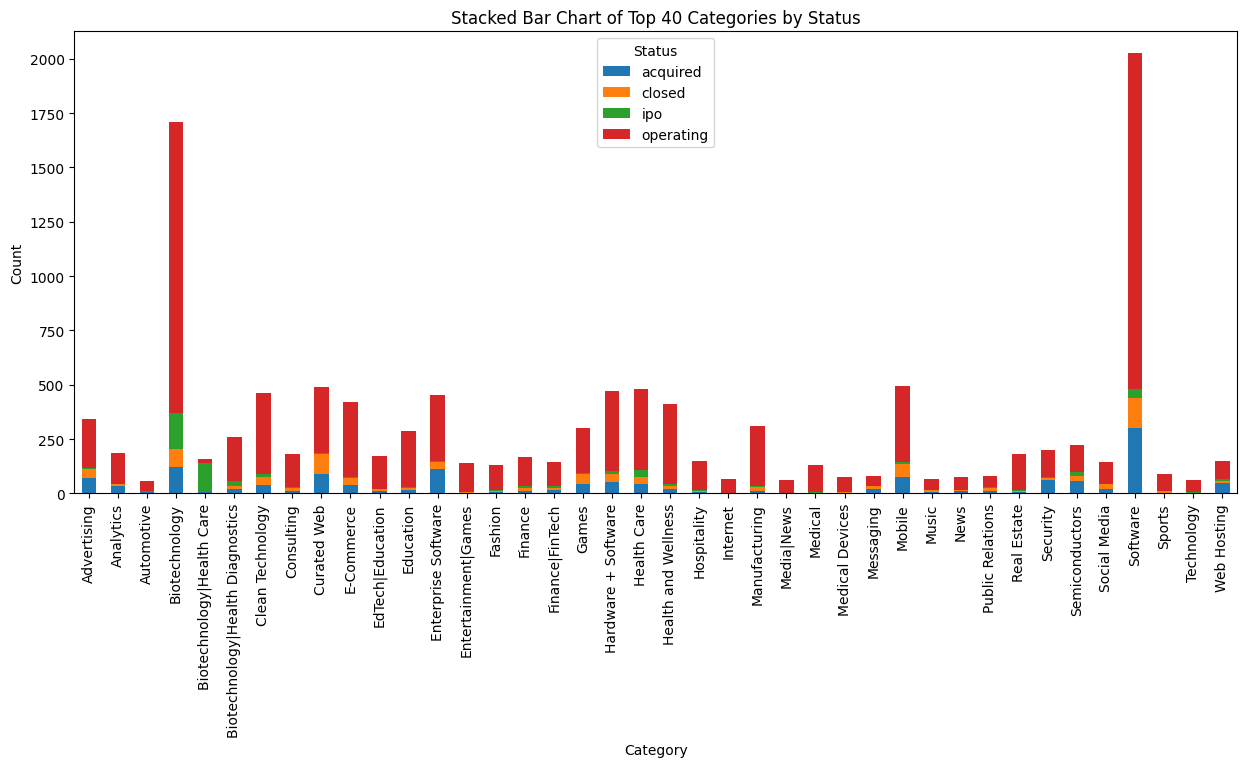

In [67]:
status_counts.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Stacked Bar Chart of Top 40 Categories by Status')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()

# DATA PREPROCESSING

In [68]:
data_pre = data.copy()

In [69]:
data_pre.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


In [70]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [71]:
data_pre.nunique()

,0
permalink,66368
name,66102
homepage_url,61191
category_list,27296
funding_total_usd,18896
status,4
country_code,137
state_code,311
region,1092
city,5111


## Pisahkan data sukses dan closed(fail)

In [72]:
data_pre['status'] =  data_pre['status'].replace(['ipo', 'acquired'], 'success')

## Ubah founded_at ke dalam numerik tahun

In [73]:
data_pre['founded_at'].isna().sum()

15221

In [74]:
data_pre['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')

In [75]:
data_pre['founded_year'] = data_pre['founded_at'].dt.year

In [76]:
data_pre['founded_year'] = data_pre['founded_year'].astype('Int64')

In [77]:
data_pre['founded_year'].isna().sum()

15225

In [78]:
# data_pre['founded_year'].fillna(data_pre['founded_year'].median(), inplace=True)

In [79]:
data_pre['founded_year'].describe()

,founded_year
count,51143.00
mean,2007.76
std,10.30
min,1749.00
25%,2006.00
50%,2010.00
75%,2013.00
max,2105.00


Hilangkan outlier tahun

In [80]:
Q1 = data_pre['founded_year'].quantile(0.25)
Q3 = data_pre['founded_year'].quantile(0.75)
IQR = Q3 - Q1

# Menghilangkan outlier berdasarkan IQR
data_pre = data_pre[(data_pre['founded_year'] >= Q1 - 1.5 * IQR) & (data_pre['founded_year'] <= Q3 + 1.5 * IQR)]

In [81]:
data_pre['founded_year'].describe()

,founded_year
count,48746.00
mean,2009.24
std,4.48
min,1996.00
25%,2007.00
50%,2011.00
75%,2013.00
max,2016.00


In [82]:
data_pre['founded_year'].isna().sum()

0

In [83]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48746 entries, 1 to 66366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          48746 non-null  object        
 1   name               48745 non-null  object        
 2   homepage_url       46200 non-null  object        
 3   category_list      47492 non-null  object        
 4   funding_total_usd  48746 non-null  object        
 5   status             48746 non-null  object        
 6   country_code       45149 non-null  object        
 7   state_code         44069 non-null  object        
 8   region             44549 non-null  object        
 9   city               44550 non-null  object        
 10  funding_rounds     48746 non-null  int64         
 11  founded_at         48746 non-null  datetime64[ns]
 12  first_funding_at   48725 non-null  object        
 13  last_funding_at    48746 non-null  object        
 14  founded_yea

## analisa funding round

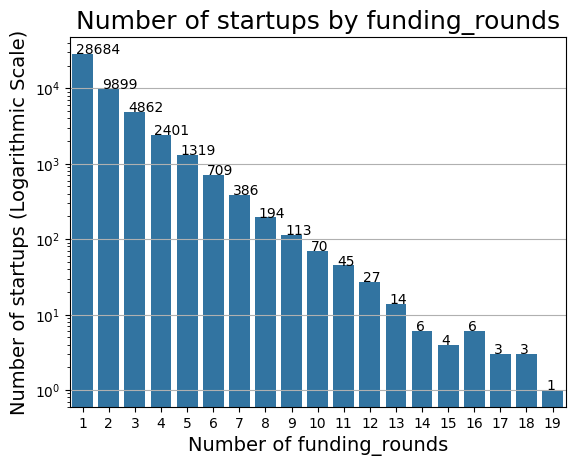

In [84]:
sns.barplot(x=data_pre['funding_rounds'].value_counts().index, y=data_pre['funding_rounds'].value_counts())
plt.title('Number of startups by funding_rounds',size=18)
plt.ylabel('Number of startups (Logarithmic Scale)',size=14)
plt.xlabel('Number of funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(data_pre['funding_rounds'].value_counts().index,data_pre['funding_rounds'].value_counts())

Saat dihilangkan outlier korelasi terhadap status berkurang

In [85]:
# # Hitung nilai IQR
# Q1 = data_pre['funding_rounds'].quantile(0.25)
# Q3 = data_pre['funding_rounds'].quantile(0.75)
# IQR = Q3 - Q1

# # Tentukan batas bawah dan batas atas untuk mengidentifikasi outlier
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Hapus outlier berdasarkan batas bawah dan batas atas
# data_pre = data_pre[(data_pre['funding_rounds'] >= lower_bound) & (data_pre['funding_rounds'] <= upper_bound)]

# # Tampilkan data setelah menghapus outlier

# data_pre.describe()

In [86]:
def clip_upper_bound(data, column_name, multiplier=1.5):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + multiplier * IQR
    return data[data[column_name] <= upper_bound]

# Memanggil fungsi untuk menghilangkan outlier
data_pre = clip_upper_bound(data_pre, 'funding_rounds')

## First_funding_at and last_funding_at

In [87]:
data_pre['first_funding_at'].isna().sum()

16

In [88]:
data_pre['last_funding_at'].isna().sum()

0

In [89]:
data_pre.dropna(subset=['first_funding_at'],inplace=True)

In [90]:
data_pre['founded_at'].isna().sum()

0







### tambahkan kolom funding duration

In [91]:
import pandas as pd
import numpy as np

# Konversi kolom 'first_funding_at' dan 'last_funding_at' ke tipe data datetime jika belum
data_pre['first_funding_at'] = pd.to_datetime(data_pre['first_funding_at'], errors='coerce')
data_pre['last_funding_at'] = pd.to_datetime(data_pre['last_funding_at'], errors='coerce')

# Mengganti nilai-nilai tanggal yang berada di luar batas dengan NaN
invalid_date_mask = (data_pre['first_funding_at'] < pd.Timestamp('1900-01-01')) | (data_pre['first_funding_at'] > pd.Timestamp.now()) | (data_pre['last_funding_at'] < pd.Timestamp('1900-01-01')) | (data_pre['last_funding_at'] > pd.Timestamp.now())
data_pre.loc[invalid_date_mask, ['first_funding_at', 'last_funding_at']] = np.nan

# Mengecek apakah ada nilai NaN di kedua kolom
nan_mask = data_pre['first_funding_at'].isna() | data_pre['last_funding_at'].isna()
if nan_mask.any():
    print("Ada nilai NaN dalam kolom 'first_funding_at' atau 'last_funding_at'.")
    # Mengganti nilai NaN dengan tanggal awal atau akhir data
    data_pre['first_funding_at'].fillna(data_pre['first_funding_at'].min(), inplace=True)
    data_pre['last_funding_at'].fillna(data_pre['last_funding_at'].max(), inplace=True)

# Menghitung ulang selisih waktu
data_pre['funding_duration'] = data_pre['last_funding_at'] - data_pre['first_funding_at']


Ada nilai NaN dalam kolom 'first_funding_at' atau 'last_funding_at'.


<ipython-input-91-d125bcb5f30e>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_pre['first_funding_at'].fillna(data_pre['first_funding_at'].min(), inplace=True)
<ipython-input-91-d125bcb5f30e>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [92]:
data_pre['funding_duration'].describe()

,funding_duration
count,43429
mean,237 days 04:14:13.144212392
std,496 days 08:17:13.997271944
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,299 days 00:00:00
max,10932 days 00:00:00


ubah fundinf duration kedalam hari

In [93]:
data_pre['funding_duration'] = data_pre['funding_duration'].dt.days

In [94]:
data_pre['funding_duration'].info()

<class 'pandas.core.series.Series'>
Index: 43429 entries, 1 to 66366
Series name: funding_duration
Non-Null Count  Dtype
--------------  -----
43429 non-null  int64
dtypes: int64(1)
memory usage: 678.6 KB


In [95]:
def clip_upper_bound(data, column_name, multiplier=1.5):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + multiplier * IQR
    return data[data[column_name] <= upper_bound]

# Memanggil fungsi untuk menghilangkan outlier
data_pre= clip_upper_bound(data_pre, 'funding_duration')

In [96]:
# data_pre['funding_duration'].describe()

ubah first_funding ke int dalam tahun

In [97]:
data_pre['first_funding_at'] = pd.to_datetime(data_pre['first_funding_at'])

# Mengambil tahun dari setiap tanggal
data_pre['first_funding_year'] = data_pre['first_funding_at'].dt.year

# Mengubah menjadi tipe data integer
data_pre['first_funding_year'] = data_pre['first_funding_year'].astype(int)

<ipython-input-97-f7d58570d3c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['first_funding_at'] = pd.to_datetime(data_pre['first_funding_at'])
<ipython-input-97-f7d58570d3c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['first_funding_year'] = data_pre['first_funding_at'].dt.year
<ipython-input-97-f7d58570d3c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

ubah last_funding ke int dalam tahun

In [98]:
data_pre['last_funding_at'] = pd.to_datetime(data_pre['last_funding_at'])

# Mengambil tahun dari setiap tanggal
data_pre['last_funding_year'] = data_pre['last_funding_at'].dt.year

# Mengubah menjadi tipe data integer
data_pre['last_funding_year'] = data_pre['last_funding_year'].astype(int)

<ipython-input-98-908ae24b7323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['last_funding_at'] = pd.to_datetime(data_pre['last_funding_at'])
<ipython-input-98-908ae24b7323>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['last_funding_year'] = data_pre['last_funding_at'].dt.year
<ipython-input-98-908ae24b7323>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [99]:
Q1 = data_pre['last_funding_year'].quantile(0.25)
Q3 = data_pre['last_funding_year'].quantile(0.75)
IQR = Q3 - Q1

# Menghilangkan outlier berdasarkan IQR
data_pre = data_pre[(data_pre['last_funding_year'] >= Q1 - 1 * IQR) & (data_pre['last_funding_year'] <= Q3 + 1 * IQR)]

In [100]:
data_pre.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014,227,2014,2014
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007,0,2008,2008
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,2010,0,2014,2014
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,1997,101,2009,2009
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,2012,0,2013,2013


In [101]:
data_pre['funding_duration'].describe()

,funding_duration
count,35469.00
mean,93.99
std,188.90
min,0.00
25%,0.00
50%,0.00
75%,19.00
max,747.00


In [102]:
# data_pre['funding_duration'] = data_pre['funding_duration'].dt.days

In [103]:
data_pre['funding_duration'].info()

<class 'pandas.core.series.Series'>
Index: 35469 entries, 1 to 66366
Series name: funding_duration
Non-Null Count  Dtype
--------------  -----
35469 non-null  int64
dtypes: int64(1)
memory usage: 554.2 KB


In [104]:
# def clip_upper_bound(data, column_name, multiplier=1.5):
#     Q1 = data[column_name].quantile(0.25)
#     Q3 = data[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_bound = Q3 + multiplier * IQR
#     return data[data[column_name] <= upper_bound]

# # Memanggil fungsi untuk menghilangkan outlier
# data_pre= clip_upper_bound(data_pre, 'funding_duration')

In [105]:
data_pre['funding_duration'].describe()

,funding_duration
count,35469.00
mean,93.99
std,188.90
min,0.00
25%,0.00
50%,0.00
75%,19.00
max,747.00


## funding_total_usd

ubah total fund ke numerik

In [106]:
data_pre['funding_total_usd'] = pd.to_numeric(data_pre['funding_total_usd'].str.replace(',', ''), errors='coerce')

In [107]:
data_pre[data_pre['funding_total_usd'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,2010,0,2014,2014
11,/organization/1-618-technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,NaN,operating,USA,FL,Orlando,Orlando,1,2013-12-07,2014-01-22,2014-01-22,2013,0,2014,2014
22,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,NaN,operating,IND,25,Chennai,Chennai,1,2008-01-01,2013-07-22,2013-07-22,2008,0,2013,2013
33,/organization/10alike,Cliptone,http://www.cliptone.me/,Advertising|Image Recognition|Sales and Market...,NaN,operating,CAN,ON,Toronto,Toronto,2,2012-03-03,2013-01-01,2014-01-01,2012,365,2013,2014
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,NaN,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03,2012,187,2013,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66306,/organization/zurn-international-e-commerce-co...,Zurn,http://www.zurn.com,Social Media,NaN,operating,CHN,NaN,NaN,NaN,1,2013-01-01,2013-12-01,2013-12-01,2013,0,2013,2013
66316,/organization/zuuka,zuuka!,http://www.istorytime.com,Apps|Entertainment|Kids|Mobile|Publishing,NaN,success,USA,CA,Santa Barbara,Santa Barbara,2,2009-04-10,2011-01-24,2012-06-11,2009,504,2011,2012
66345,/organization/zymochem,Zymochem,http://www.zymochem.com,Specialty Chemicals,NaN,operating,USA,CA,SF Bay Area,San Francisco,1,2013-05-01,2015-03-16,2015-03-16,2013,0,2015,2015
66346,/organization/zympi,Zympi,http://www.zympi.com,Mobile|Networking|Web Hosting,NaN,operating,USA,CA,Ontario - Inland Empire,Redlands,1,2010-09-03,2011-11-22,2011-11-22,2010,0,2011,2011


In [108]:
data_pre['funding_total_usd'].isnull().sum()

7977

In [109]:
data_pre['funding_total_usd'].describe()

,funding_total_usd
count,27492.00
mean,6506905.31
std,46999015.04
min,1.00
25%,150000.00
50%,800000.00
75%,3128829.50
max,4630000000.00


In [110]:
# data_pre.dropna(subset=['funding_total_usd'], inplace=True)

In [111]:
data_pre['funding_total_usd'].fillna(data_pre['funding_total_usd'].median(), inplace=True)

<ipython-input-111-c11362b02434>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_pre['funding_total_usd'].fillna(data_pre['funding_total_usd'].median(), inplace=True)


In [112]:
data_pre['funding_total_usd'].isna().sum()

0

In [113]:
# data_pre['funding_total_usd'].fillna(data_pre['funding_total_usd'].median(), inplace=True)

Hilangkan Outlier total_funding_usd

In [114]:
Q1 = data_pre['funding_total_usd'].quantile(0.25)
Q3 = data_pre['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

# Menghilangkan outlier berdasarkan IQR
data_pre = data_pre[(data_pre['funding_total_usd'] >= Q1 - 2.5 * IQR) & (data_pre['funding_total_usd'] <= Q3 + 2.5 * IQR)]

In [115]:
data_pre['funding_total_usd'].describe()

,funding_total_usd
count,31168.00
mean,1052523.45
std,1260600.45
min,1.00
25%,200000.00
50%,800000.00
75%,1040000.00
max,6360000.00


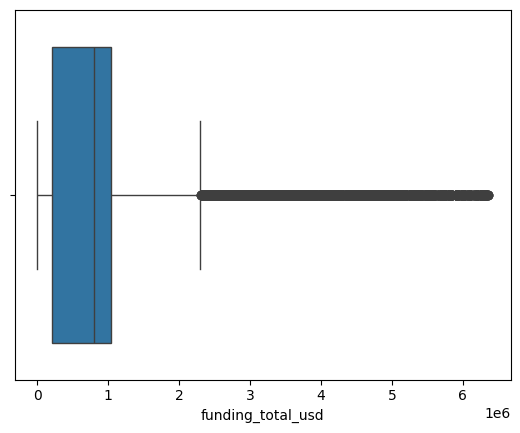

In [116]:
sns.boxplot(x=data_pre['funding_total_usd'])
plt.show()

In [117]:
data_pre.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year
count,31168.00,31168.00,31168,31168,31168,31168.00,31168.00,31168.00,31168.00
mean,1052523.45,1.27,2011-01-25 08:11:40.410677760,2013-03-01 14:33:01.108829696,2013-05-17 06:27:34.928131584,2010.80,76.66,2012.70,2012.91
min,1.00,1.00,1996-01-01 00:00:00,2006-01-01 00:00:00,2008-01-01 00:00:00,1996.00,0.00,2006.00,2008.00
25%,200000.00,1.00,2010-01-01 00:00:00,2012-01-01 00:00:00,2012-03-08 00:00:00,2010.00,0.00,2012.00,2012.00
50%,800000.00,1.00,2012-01-01 00:00:00,2013-08-28 00:00:00,2013-11-21 00:00:00,2012.00,0.00,2013.00,2013.00
75%,1040000.00,1.00,2013-07-01 00:00:00,2014-09-01 00:00:00,2014-12-01 00:00:00,2013.00,0.00,2014.00,2014.00
max,6360000.00,3.00,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,2016.00,747.00,2015.00,2015.00
std,1260600.45,0.53,NaN,NaN,NaN,3.47,170.98,1.92,1.91


In [118]:
# data_pre['funding_total_usd'].fillna(data_pre['funding_total_usd'].mean(), inplace=True)

In [119]:
# from scipy import stats

# # Hitung Z-Score
# z_scores = stats.zscore(data_pre['funding_total_usd'])

# # Tentukan batas Z-Score untuk outlier
# threshold =0.5

# # Hapus outlier berdasarkan Z-Score
# data_pre = data_pre[(z_scores < threshold) & (z_scores > -threshold)]

In [120]:
data_pre.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year
count,31168.00,31168.00,31168,31168,31168,31168.00,31168.00,31168.00,31168.00
mean,1052523.45,1.27,2011-01-25 08:11:40.410677760,2013-03-01 14:33:01.108829696,2013-05-17 06:27:34.928131584,2010.80,76.66,2012.70,2012.91
min,1.00,1.00,1996-01-01 00:00:00,2006-01-01 00:00:00,2008-01-01 00:00:00,1996.00,0.00,2006.00,2008.00
25%,200000.00,1.00,2010-01-01 00:00:00,2012-01-01 00:00:00,2012-03-08 00:00:00,2010.00,0.00,2012.00,2012.00
50%,800000.00,1.00,2012-01-01 00:00:00,2013-08-28 00:00:00,2013-11-21 00:00:00,2012.00,0.00,2013.00,2013.00
75%,1040000.00,1.00,2013-07-01 00:00:00,2014-09-01 00:00:00,2014-12-01 00:00:00,2013.00,0.00,2014.00,2014.00
max,6360000.00,3.00,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,2016.00,747.00,2015.00,2015.00
std,1260600.45,0.53,NaN,NaN,NaN,3.47,170.98,1.92,1.91


In [121]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31168 entries, 1 to 66366
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   permalink           31168 non-null  object        
 1   name                31167 non-null  object        
 2   homepage_url        29411 non-null  object        
 3   category_list       30093 non-null  object        
 4   funding_total_usd   31168 non-null  float64       
 5   status              31168 non-null  object        
 6   country_code        28191 non-null  object        
 7   state_code          27399 non-null  object        
 8   region              27768 non-null  object        
 9   city                27768 non-null  object        
 10  funding_rounds      31168 non-null  int64         
 11  founded_at          31168 non-null  datetime64[ns]
 12  first_funding_at    31168 non-null  datetime64[ns]
 13  last_funding_at     31168 non-null  datetime64[ns]


In [122]:
data_pre['funding_rounds'].isnull().sum()

0

In [123]:
data_pre['funding_rounds'].describe()

,funding_rounds
count,31168.00
mean,1.27
std,0.53
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,3.00


In [124]:
data_pre.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year
count,31168.00,31168.00,31168,31168,31168,31168.00,31168.00,31168.00,31168.00
mean,1052523.45,1.27,2011-01-25 08:11:40.410677760,2013-03-01 14:33:01.108829696,2013-05-17 06:27:34.928131584,2010.80,76.66,2012.70,2012.91
min,1.00,1.00,1996-01-01 00:00:00,2006-01-01 00:00:00,2008-01-01 00:00:00,1996.00,0.00,2006.00,2008.00
25%,200000.00,1.00,2010-01-01 00:00:00,2012-01-01 00:00:00,2012-03-08 00:00:00,2010.00,0.00,2012.00,2012.00
50%,800000.00,1.00,2012-01-01 00:00:00,2013-08-28 00:00:00,2013-11-21 00:00:00,2012.00,0.00,2013.00,2013.00
75%,1040000.00,1.00,2013-07-01 00:00:00,2014-09-01 00:00:00,2014-12-01 00:00:00,2013.00,0.00,2014.00,2014.00
max,6360000.00,3.00,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,2016.00,747.00,2015.00,2015.00
std,1260600.45,0.53,NaN,NaN,NaN,3.47,170.98,1.92,1.91


## Country_Code

In [125]:
data_pre['country_code'].nunique()

124

In [126]:
data_pre['country_code'].isna().sum()

2977

In [127]:
data_pre.dropna(subset=['country_code'], inplace=True)

In [128]:
# data_pre['country_code'].fillna('IDN', inplace=True)

In [129]:
data_pre

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.00,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014,227,2014,2014
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.00,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007,0,2008,2008
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,800000.00,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,2010,0,2014,2014
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.00,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,1997,101,2009,2009
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000.00,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,2012,0,2013,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66356,/organization/zype,Zype,http://www.zype.com,Cloud Computing|Mobile Advertising|Video|Video...,3300000.00,operating,USA,NY,New York City,New York,2,2013-01-01,2015-04-01,2015-10-27,2013,209,2015,2015
66357,/organization/zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,2150000.00,operating,USA,NY,New York City,New York,2,2011-01-01,2013-07-26,2013-09-25,2011,61,2013,2013
66361,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600.00,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2013-01-29,2013-01-29,2007,0,2013,2013
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000.00,operating,GBR,H9,London,London,3,2014-01-28,2014-03-24,2015-02-25,2014,338,2014,2015


In [130]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28191 entries, 1 to 66366
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   permalink           28191 non-null  object        
 1   name                28190 non-null  object        
 2   homepage_url        26603 non-null  object        
 3   category_list       27563 non-null  object        
 4   funding_total_usd   28191 non-null  float64       
 5   status              28191 non-null  object        
 6   country_code        28191 non-null  object        
 7   state_code          27399 non-null  object        
 8   region              27768 non-null  object        
 9   city                27768 non-null  object        
 10  funding_rounds      28191 non-null  int64         
 11  founded_at          28191 non-null  datetime64[ns]
 12  first_funding_at    28191 non-null  datetime64[ns]
 13  last_funding_at     28191 non-null  datetime64[ns]


In [131]:
data_pre['country_code'].isna().sum()

0

In [132]:
data_pre.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.00,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014,227,2014,2014
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.00,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007,0,2008,2008
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,800000.00,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,2010,0,2014,2014
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.00,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,1997,101,2009,2009
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000.00,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,2012,0,2013,2013


metode label encoding pada kolom country_code

In [133]:
data_pre['country_code']

,country_code
1,USA
3,CHN
4,USA
6,CAN
9,CHL
...,...
66356,USA
66357,USA
66361,AUT
66362,GBR


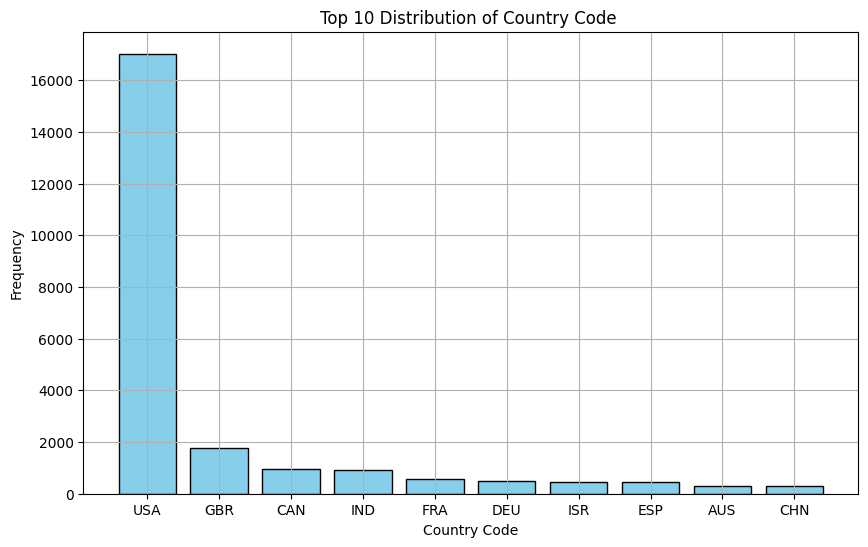

In [134]:
top_10_countries = data_pre['country_code'].value_counts().head(10)

# Membuat histogram dari fitur 'country_code_encoded'
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values, color='skyblue', edgecolor='black')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Top 10 Distribution of Country Code ')
plt.grid(True)
plt.show()

In [135]:
# data_pre['country_code_encoded'].nunique()

In [136]:
continents = {
  'asia': ['CHN', 'IND', 'JPN', 'RUS', 'KOR', 'ISR', 'JOR', 'TUR', 'ARE', 'CYP', 'IDN', 'TWN', 'THA', 'PHL', 'LBN', 'IRN', 'MYS', 'ARM', 'BGD', 'NPL', 'BHR', 'PAK', 'MMR', 'QAT', 'SAU', 'GEO', 'AZE', 'OMN', 'KHM', 'LAO', 'LKA', 'BAH'],
  'europe': ['GBR', 'FRA', 'DNK', 'ROM', 'AUT', 'NLD', 'SWE', 'ESP', 'BEL', 'IRL', 'ITA',
              'CZE', 'DEU', 'CHE', 'BGR', 'HUN', 'FIN', 'SVN', 'SVK', 'PRT', 'NOR', 'UKR',
              'LTU', 'ISL', 'POL', 'ALB', 'HRV', 'EST', 'LUX', 'MDA', 'GRC', 'LVA', 'SRB',
              'BLR', 'MKD', 'LIE'],
  'australia': ['AUS', 'NZL'],
  'africa': ['BWA', 'NGA', 'GHA', 'EGY', 'UGA', 'KEN', 'MUS', 'TUN', 'CMR', 'TGO', 'MAR',
              'DZA', 'RWA', 'SOM', 'SYC', 'TAN'],
  'north_america': ['USA', 'CAN', 'CRI', 'MEX', 'PAN', 'GTM', 'TTO', 'CYM', 'SLV', 'BMU',
                    'HND', 'DOM', 'JAM', 'DMA', 'GRD'],
  'south_america': ['CHL', 'COL', 'BRA', 'ARG', 'PER', 'ECU', 'PRY']
}

continent_data1 = pd.DataFrame([(k, v) for k, lst in continents.items() for v in lst], columns=['continents', 'country_code'])
data_pre = pd.merge(continent_data1, data_pre, on='country_code')



In [137]:
data_pre

,continents,country_code,permalink,name,homepage_url,category_list,funding_total_usd,status,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year
0,asia,CHN,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.00,operating,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007,0,2008,2008
1,asia,CHN,/organization/1bib,1bib,http://www.1bib.com,Cars|Curated Web,800000.00,closed,30,Guangzhou,Guangzhou,1,2006-01-01,2008-02-07,2008-02-07,2006,0,2008,2008
2,asia,CHN,/organization/21cake-food-co,21Cake Food Co.,http://www.21cake.com,Delivery|Hospitality|Manufacturing,1464128.00,operating,22,Beijing,Beijing,1,2004-01-01,2010-01-22,2010-01-22,2004,0,2010,2010
3,asia,CHN,/organization/2345-com,2345.com,http://www.2345.com,Software,1610541.00,operating,23,Shanghai,Shanghai,2,2005-09-01,2010-05-01,2010-10-01,2005,153,2010,2010
4,asia,CHN,/organization/360guanxi,360Guanxi,http://www.360guanxi.com/index.html,Biotechnology|Life Sciences|Media|News|Pharmac...,5000000.00,operating,23,Shanghai,Shanghai,1,2000-01-01,2009-06-01,2009-06-01,2000,0,2009,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27679,south_america,ECU,/organization/couchy-com,Couchy.com,http://couchy.com/,Social Media,130213.00,operating,18,Quito,Quito,3,2012-01-01,2012-01-05,2012-08-10,2012,218,2012,2012
27680,south_america,ECU,/organization/gkill-city,GkillCity,http://gkillcity.com/,Audio|Content|Digital Media,75000.00,operating,10,Guayaquil,Guayaquil,1,2011-01-01,2014-08-05,2014-08-05,2011,0,2014,2014
27681,south_america,ECU,/organization/personaling,Personaling,http://personaling.com,E-Commerce|Fashion|Retail,386386.00,operating,10,ECU - Other,España,2,2012-09-01,2013-10-01,2014-03-01,2012,151,2013,2014
27682,south_america,ECU,/organization/revolucionatuprecio-com,RevolucionaTuPrecio.com,http://www.RevolucionaTuPrecio.com,Design|E-Commerce|Electronics|Retail,50000.00,operating,18,Quito,Quito,1,2013-10-04,2013-12-10,2013-12-10,2013,0,2013,2013


In [138]:
data_pre['continents'].isna().sum()

0

In [139]:
# data_pre['country_code_encoded'] = data_pre['country_code'].apply(lambda x: 1 if x == 'USA' else 0)

# # Proses label encoding untuk negara-negara lainnya
# other_countries = data_pre['country_code'][data_pre['country_code'] != 'USA'].unique()
# for country in other_countries:
#     data_pre['country_code_encoded'] = data_pre['country_code_encoded'].replace({country: 2})

In [140]:
# data_pre['continents_encoded'] = data_pre['continents'].apply(lambda x: 1 if x == 'USA' else 0)

# # Proses label encoding untuk negara-negara lainnya
# other_countries = data_pre['continents'][data_pre['continents'] != 'USA'].unique()
# for country in other_countries:
#     data_pre['continents_encoded'] = data_pre['continents_encoded'].replace({country: 2})

In [141]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Menggunakan LabelEncoder pada kolom 'country_code'
data_pre['country_code_encoded'] = label_encoder.fit_transform(data_pre['country_code'])

In [142]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Menggunakan LabelEncoder pada kolom 'continents'
data_pre['continents_encoded'] = label_encoder.fit_transform(data_pre['continents'])

In [143]:
data_pre['continents_encoded'].unique()

array([1, 3, 2, 0, 4, 5])

## Status

In [144]:

data_pre['status_encode'] = label_encoder.fit_transform(data_pre['status'])

In [145]:
data_pre[data_pre['status_encode'] == 0]

,continents,country_code,permalink,name,homepage_url,category_list,funding_total_usd,status,state_code,region,...,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year,country_code_encoded,continents_encoded,status_encode
1,asia,CHN,/organization/1bib,1bib,http://www.1bib.com,Cars|Curated Web,800000.00,closed,30,Guangzhou,...,2006-01-01,2008-02-07,2008-02-07,2006,0,2008,2008,19,1,0
15,asia,CHN,/organization/99times-cn,99times.cn,http://www.99times.cn,E-Commerce,800000.00,closed,23,Shanghai,...,2005-01-01,2010-08-23,2010-08-23,2005,0,2010,2010,19,1,0
16,asia,CHN,/organization/9car-technology-llc,9car Technology LLC,http://www.chejianghu.com,Automotive|Cars|E-Commerce,80000.00,closed,22,Beijing,...,2009-11-18,2009-11-18,2010-01-06,2009,49,2009,2010,19,1,0
35,asia,CHN,/organization/become-media-inc,Become Media Inc.,http://www.becomedia.cn/en,SNS|Social Media,100000.00,closed,23,Shanghai,...,2008-08-30,2008-12-31,2008-12-31,2008,0,2008,2008,19,1,0
77,asia,CHN,/organization/dfr-asia,DFR Asia,http://www.dfra.com,Angels|Digital Media|Entertainment|Finance|Mus...,800000.00,closed,23,Shanghai,...,2007-05-08,2015-06-13,2015-06-13,2007,0,2015,2015,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27650,south_america,ARG,/organization/yoquevos,YoQueVos,http://www.yoquevos.com,Curated Web,25000.00,closed,7,Buenos Aires,...,2008-10-01,2011-09-01,2011-09-01,2008,0,2011,2011,2,5,0
27664,south_america,PER,/organization/face-me,Face-Me,http://face-me.pe/,Games|Graphics|Toys,50000.00,closed,15,Lima,...,2012-01-01,2011-12-01,2011-12-01,2012,0,2011,2011,80,5,0
27668,south_america,PER,/organization/iconografico,ICONOGRAFICO,http://www.iconografico.pe,Design,50000.00,closed,15,Lima,...,2012-09-01,2012-08-01,2012-08-01,2012,0,2012,2012,80,5,0
27673,south_america,PER,/organization/novelo,Novelo,http://getnovelo.com,E-Commerce|Facebook Applications|Services|Shop...,80000.00,closed,13,PER - Other,...,2011-04-20,2011-06-01,2011-06-20,2011,19,2011,2011,80,5,0


In [146]:
data_pre.head()

,continents,country_code,permalink,name,homepage_url,category_list,funding_total_usd,status,state_code,region,...,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year,country_code_encoded,continents_encoded,status_encode
0,asia,CHN,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.00,operating,22,Beijing,...,2007-01-01,2008-03-19,2008-03-19,2007,0,2008,2008,19,1,1
1,asia,CHN,/organization/1bib,1bib,http://www.1bib.com,Cars|Curated Web,800000.00,closed,30,Guangzhou,...,2006-01-01,2008-02-07,2008-02-07,2006,0,2008,2008,19,1,0
2,asia,CHN,/organization/21cake-food-co,21Cake Food Co.,http://www.21cake.com,Delivery|Hospitality|Manufacturing,1464128.00,operating,22,Beijing,...,2004-01-01,2010-01-22,2010-01-22,2004,0,2010,2010,19,1,1
3,asia,CHN,/organization/2345-com,2345.com,http://www.2345.com,Software,1610541.00,operating,23,Shanghai,...,2005-09-01,2010-05-01,2010-10-01,2005,153,2010,2010,19,1,1
4,asia,CHN,/organization/360guanxi,360Guanxi,http://www.360guanxi.com/index.html,Biotechnology|Life Sciences|Media|News|Pharmac...,5000000.00,operating,23,Shanghai,...,2000-01-01,2009-06-01,2009-06-01,2000,0,2009,2009,19,1,1


In [147]:
data_pre['category_list'].nunique()

14166

In [148]:
data_pre.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,first_funding_year,last_funding_year,country_code_encoded,continents_encoded,status_encode
count,27684.00,27684.00,27684,27684,27684,27684.00,27684.00,27684.00,27684.00,27684.00,27684.00,27684.00
mean,1087376.23,1.28,2010-12-06 13:59:06.944082944,2013-02-13 12:36:27.776333056,2013-05-04 05:02:37.607282432,2010.67,79.68,2012.65,2012.87,80.08,3.47,0.97
min,1.00,1.00,1996-01-01 00:00:00,2006-01-01 00:00:00,2008-01-01 00:00:00,1996.00,0.00,2006.00,2008.00,0.00,0.00,0.00
25%,220000.00,1.00,2009-09-01 00:00:00,2011-12-26 18:00:00,2012-02-22 00:00:00,2009.00,0.00,2011.00,2012.00,46.00,3.00,1.00
50%,800000.00,1.00,2012-01-01 00:00:00,2013-08-05 00:00:00,2013-11-01 00:00:00,2012.00,0.00,2013.00,2013.00,105.00,4.00,1.00
75%,1150020.75,1.00,2013-05-01 00:00:00,2014-08-11 00:00:00,2014-11-11 00:00:00,2013.00,0.00,2014.00,2014.00,105.00,4.00,1.00
max,6360000.00,3.00,2016-01-01 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,2016.00,747.00,2015.00,2015.00,105.00,5.00,2.00
std,1288002.20,0.54,NaN,NaN,NaN,3.50,173.89,1.92,1.91,34.69,1.00,0.35


## CATEGORY LIST

In [149]:
label_encoder = LabelEncoder()
data_pre['category_list_encoded'] = label_encoder.fit_transform(data_pre['category_list'])

# Menampilkan hasil encoding
data_pre[['category_list', 'category_list_encoded']]

,category_list,category_list_encoded
0,Curated Web,7582
1,Cars|Curated Web,5315
2,Delivery|Hospitality|Manufacturing,8394
3,Software,13962
4,Biotechnology|Life Sciences|Media|News|Pharmac...,4487
...,...,...
27679,Social Media,13916
27680,Audio|Content|Digital Media,3379
27681,E-Commerce|Fashion|Retail,9086
27682,Design|E-Commerce|Electronics|Retail,8452


# MODELLING

sortir feature yang diperlukan

In [150]:
data_mod = data_pre[['funding_total_usd','funding_rounds','continents_encoded','status_encode','funding_duration','founded_year','first_funding_year',	'last_funding_year','category_list_encoded','country_code_encoded']]
data_mod.head()

,funding_total_usd,funding_rounds,continents_encoded,status_encode,funding_duration,founded_year,first_funding_year,last_funding_year,category_list_encoded,country_code_encoded
0,2000000.00,1,1,1,0,2007,2008,2008,7582,19
1,800000.00,1,1,0,0,2006,2008,2008,5315,19
2,1464128.00,1,1,1,0,2004,2010,2010,8394,19
3,1610541.00,2,1,1,153,2005,2010,2010,13962,19
4,5000000.00,1,1,1,0,2000,2009,2009,4487,19


cek heatmap

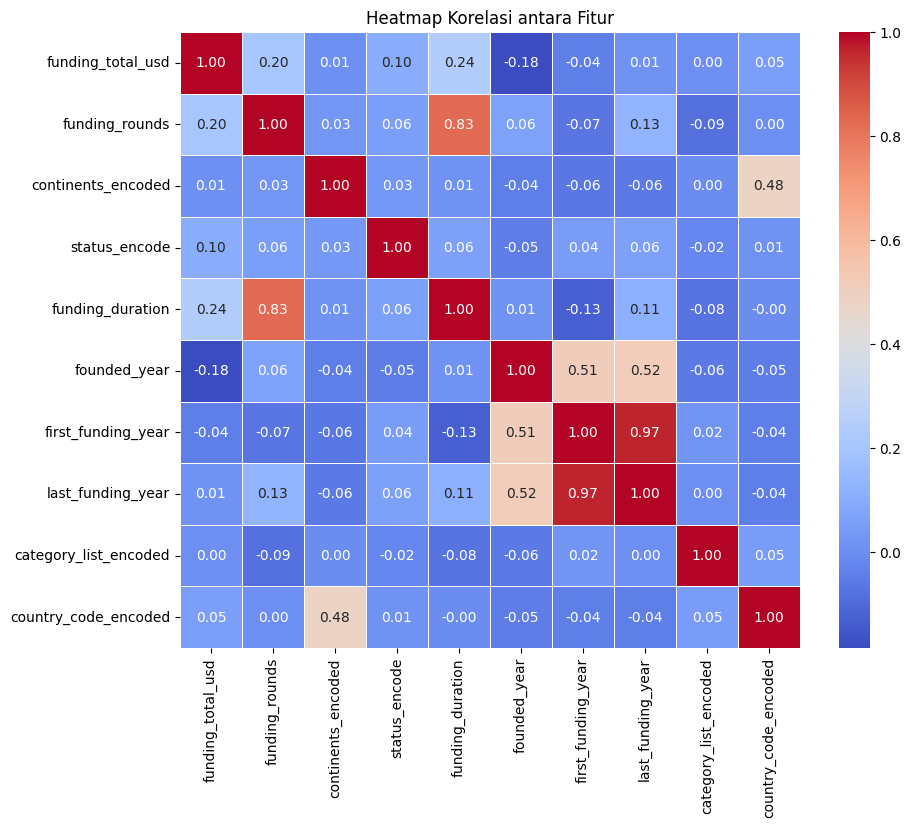

In [151]:
correlation_matrix = data_mod.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antara Fitur')
plt.show()

In [152]:
data_mod.describe()

,funding_total_usd,funding_rounds,continents_encoded,status_encode,funding_duration,founded_year,first_funding_year,last_funding_year,category_list_encoded,country_code_encoded
count,27684.00,27684.00,27684.00,27684.00,27684.00,27684.00,27684.00,27684.00,27684.00,27684.00
mean,1087376.23,1.28,3.47,0.97,79.68,2010.67,2012.65,2012.87,8730.39,80.08
std,1288002.20,0.54,1.00,0.35,173.89,3.50,1.92,1.91,4295.86,34.69
min,1.00,1.00,0.00,0.00,0.00,1996.00,2006.00,2008.00,0.00,0.00
25%,220000.00,1.00,3.00,1.00,0.00,2009.00,2011.00,2012.00,5006.75,46.00
50%,800000.00,1.00,4.00,1.00,0.00,2012.00,2013.00,2013.00,9586.50,105.00
75%,1150020.75,1.00,4.00,1.00,0.00,2013.00,2014.00,2014.00,12761.00,105.00
max,6360000.00,3.00,5.00,2.00,747.00,2016.00,2015.00,2015.00,14166.00,105.00


pisahkan feature target

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data_mod[['funding_total_usd','funding_rounds' ,'continents_encoded','funding_duration','founded_year','first_funding_year','category_list_encoded','country_code_encoded']]
y = data_mod['status_encode']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

scaler = StandardScaler()

In [155]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [156]:
class_score = pd.DataFrame(columns=["Model", "Accuracy"])

pd.options.display.float_format = '{:.2f}'.format

# Karena nilai akurasi yang mendekati 1 itu semakin baik, maka kita beri parameter ascending=False
class_score.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy


## Dession Tree Classifier

In [157]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=40)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=40)

In [158]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

class_score.loc[len(class_score)] = ["DTC", accuracy]

class_score



Accuracy: 0.79

Confusion Matrix:
[[  63  316   32]
 [ 345 4290  233]
 [  30  184   44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.15      0.15       411
           1       0.90      0.88      0.89      4868
           2       0.14      0.17      0.16       258

    accuracy                           0.79      5537
   macro avg       0.39      0.40      0.40      5537
weighted avg       0.80      0.79      0.80      5537



,Model,Accuracy
0,DTC,0.79


## Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Lakukan prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Tampilkan hasil evaluasi
print(f'Random Forest Classifier:\nAccuracy: {accuracy_rf:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('\nClassification Report:')
print(class_report_rf)

class_score.loc[len(class_score)] = ["Random Forest", accuracy_rf]

class_score

Random Forest Classifier:
Accuracy: 0.87

Confusion Matrix:
[[  31  371    9]
 [  71 4777   20]
 [  14  230   14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.08      0.12       411
           1       0.89      0.98      0.93      4868
           2       0.33      0.05      0.09       258

    accuracy                           0.87      5537
   macro avg       0.49      0.37      0.38      5537
weighted avg       0.82      0.87      0.83      5537



,Model,Accuracy
0,DTC,0.79
1,Random Forest,0.87


In [160]:
from sklearn.model_selection import GridSearchCV

# Definisikan kumpulan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 5]
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Latih model dengan GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Buat model dengan parameter terbaik
best_model_rf = grid_search.best_estimator_

# Lakukan prediksi pada data uji menggunakan model terbaik
y_pred_best_rf = best_model_rf.predict(X_test_scaled)

# Evaluasi performa model terbaik
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)

# Tampilkan hasil evaluasi model terbaik
print(f'Random Forest Classifier (Best Model):\nAccuracy: {accuracy_best_rf:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_best_rf)
print('\nClassification Report:')
print(class_report_best_rf)


Parameter terbaik: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Classifier (Best Model):
Accuracy: 0.88

Confusion Matrix:
[[   0  411    0]
 [   0 4868    0]
 [   0  258    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       411
           1       0.88      1.00      0.94      4868
           2       0.00      0.00      0.00       258

    accuracy                           0.88      5537
   macro avg       0.29      0.33      0.31      5537
weighted avg       0.77      0.88      0.82      5537



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Gradien Boosting Classifier

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_scaled, y_train)

# Lakukan prediksi pada data uji
y_pred_gb = model_gb.predict(X_test_scaled)

# Evaluasi performa model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Tampilkan hasil evaluasi
print(f'Gradient Boosting Classifier:\nAccuracy: {accuracy_gb:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_gb)
print('\nClassification Report:')
print(class_report_gb)

class_score.loc[len(class_score)] = ["Gradient Boosting", accuracy_gb]

class_score

Gradient Boosting Classifier:
Accuracy: 0.88

Confusion Matrix:
[[   3  406    2]
 [   9 4853    6]
 [   2  250    6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.01      0.01       411
           1       0.88      1.00      0.94      4868
           2       0.43      0.02      0.04       258

    accuracy                           0.88      5537
   macro avg       0.51      0.34      0.33      5537
weighted avg       0.81      0.88      0.83      5537



,Model,Accuracy
0,DTC,0.79
1,Random Forest,0.87
2,Gradient Boosting,0.88


In [162]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import pandas as pd

# # Inisialisasi model Gradient Boosting Classifier
# model_gb = GradientBoostingClassifier(random_state=42)

# # Definisi grid hyperparameter yang akan diuji
# param_grid = {
#     'learning_rate': [ 0.1, 0.2],
#     'n_estimators': [10, 20],
#     'max_depth': [3, 5],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # Membuat objek GridSearchCV
# grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=3, scoring='accuracy')

# # Melatih model menggunakan data latih yang telah discaling
# grid_search.fit(X_train_scaled, y_train)

# # Mendapatkan parameter terbaik dan model terbaik dari hasil GridSearchCV
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Lakukan prediksi pada data uji menggunakan model terbaik
# y_pred_gb = best_model.predict(X_test_scaled)

# # Evaluasi performa model
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# class_report_gb = classification_report(y_test, y_pred_gb)

# # Tampilkan hasil evaluasi
# print(f'Gradient Boosting Classifier (Hyperparameter Tuning):\nAccuracy: {accuracy_gb:.2f}\n')
# print('Confusion Matrix:')
# print(conf_matrix_gb)
# print('\nClassification Report:')
# print(class_report_gb)

# # Memperbarui dataframe dengan skor kelas
# class_score.loc[len(class_score)] = ["Gradient Boosting (Hyperparameter Tuning)", accuracy_gb]




## XGBoost Classifier

In [163]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Misalkan X_train dan y_train adalah data fitur dan target untuk data pelatihan
# X_test adalah data fitur untuk data pengujian



# Membuat model XGBoostClassifier
model_xgb = XGBClassifier(random_state=42)

# Melatih model pada data yang telah discaling
model_xgb.fit(X_train_scaled, y_train)

# Memprediksi label kelas untuk data pengujian
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Menghitung akurasi model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Akurasi model XGBoost: {:.2f}".format(accuracy_xgb ))

class_score.loc[len(class_score)] = ["XGBoost", accuracy_xgb]

class_score

Akurasi model XGBoost: 0.87


,Model,Accuracy
0,DTC,0.79
1,Random Forest,0.87
2,Gradient Boosting,0.88
3,XGBoost,0.87


In [164]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definisikan hyperparameter yang akan diuji
param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [ 0.1, 0.05],
    'n_estimators': [100, 200,],
    'objective': ['multi:softmax'],
    'num_class': [len(np.unique(y_train))],
    'random_state': [42]
}

# Buat objek model XGBoost
model = xgb.XGBClassifier()

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian hiperparameter
grid_search.fit(X_train_scaled, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Buat model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Prediksi menggunakan model terbaik
y_pred = best_model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model terbaik:{:.2f}".format(accuracy))


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Parameter terbaik: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'num_class': 3, 'objective': 'multi:softmax', 'random_state': 42}
Akurasi model terbaik:0.88


## KNN Classifier

In [165]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi dan latih model KNN
k = 99
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluasi performa model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Tampilkan hasil evaluasi
print(f'K-Nearest Neighbors (KNN):\nAccuracy: {accuracy_knn:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('\nClassification Report:')
print(class_report_knn)



class_score

# class_score.loc[len(class_score)] = ["KNN", accuracy_knn]

# class_score.sort_values(by="Accuracy", ascending=False)

K-Nearest Neighbors (KNN):
Accuracy: 0.88

Confusion Matrix:
[[   0  411    0]
 [   0 4868    0]
 [   0  258    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       411
           1       0.88      1.00      0.94      4868
           2       0.00      0.00      0.00       258

    accuracy                           0.88      5537
   macro avg       0.29      0.33      0.31      5537
weighted avg       0.77      0.88      0.82      5537



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy
0,DTC,0.79
1,Random Forest,0.87
2,Gradient Boosting,0.88
3,XGBoost,0.87


In [166]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

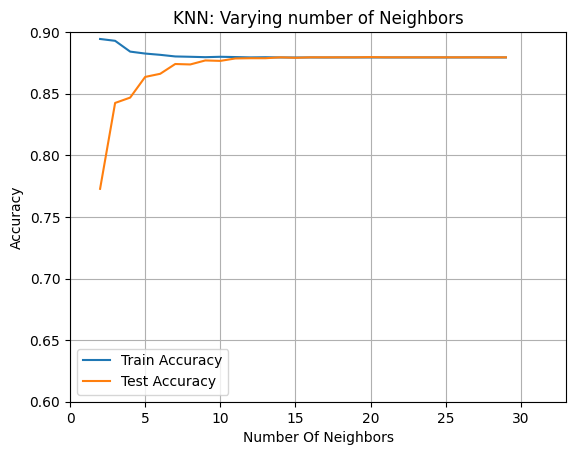

In [167]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [168]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

20


In [169]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 20}


In [170]:
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred)*100
print("Accuracy for testing dataset after tuning : {:.2f}%".format(accuracy_score))

Accuracy for testing dataset after tuning : 87.95%


## Linear Discriminat Analysis

In [171]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# model_lda = LinearDiscriminantAnalysis()
# model_lda.fit(X_train_scaled, y_train)

# # Lakukan prediksi pada data uji
# y_pred_lda = model_lda.predict(X_test_scaled)

# # Evaluasi performa model
# accuracy_lda = accuracy_score(y_test, y_pred_lda)
# conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
# class_report_lda = classification_report(y_test, y_pred_lda)

# # Tampilkan hasil evaluasi
# print(f'Linear Discriminant Analysis (LDA):\nAccuracy: {accuracy_lda:.2f}\n')
# print('Confusion Matrix:')
# print(conf_matrix_lda)
# print('\nClassification Report:')
# print(class_report_lda)

# class_score.loc[len(class_score)] = ["LDA", accuracy_lda]



TypeError: 'float' object is not callable

# Pickel

In [ ]:
import pickle

# save the model to disk
filename = 'kel-4_w-4.pkl'
pickle.dump(data_mod, open(filename, 'wb'))